In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [3]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

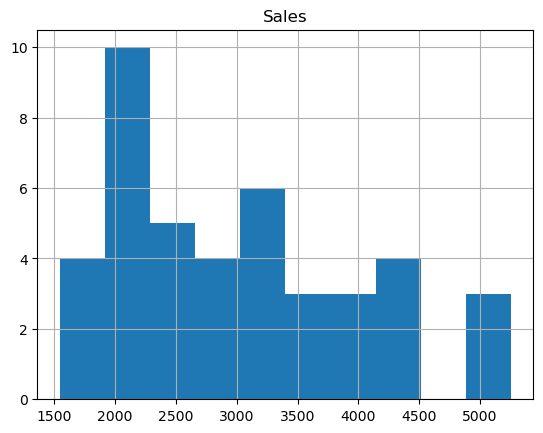

In [5]:
df.hist()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

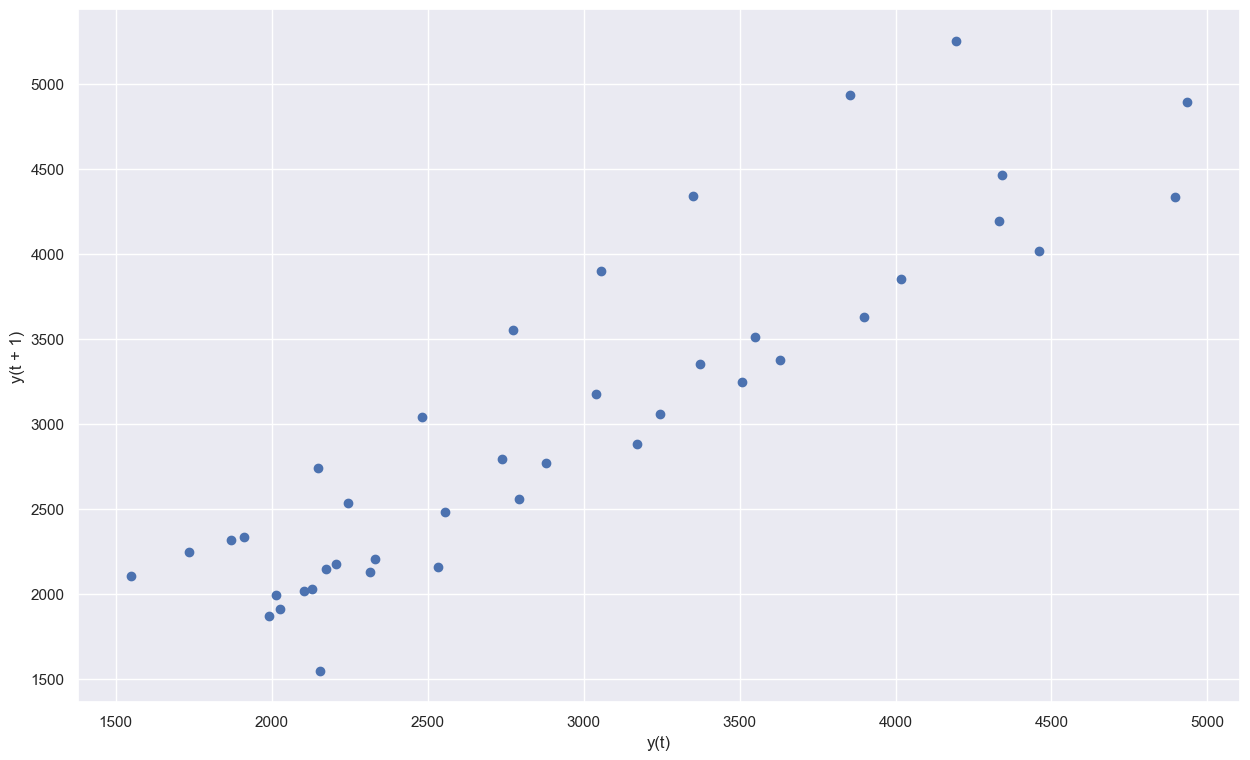

In [12]:
plt.figure(figsize = (15,9))
pd.plotting.lag_plot(df['Sales'])

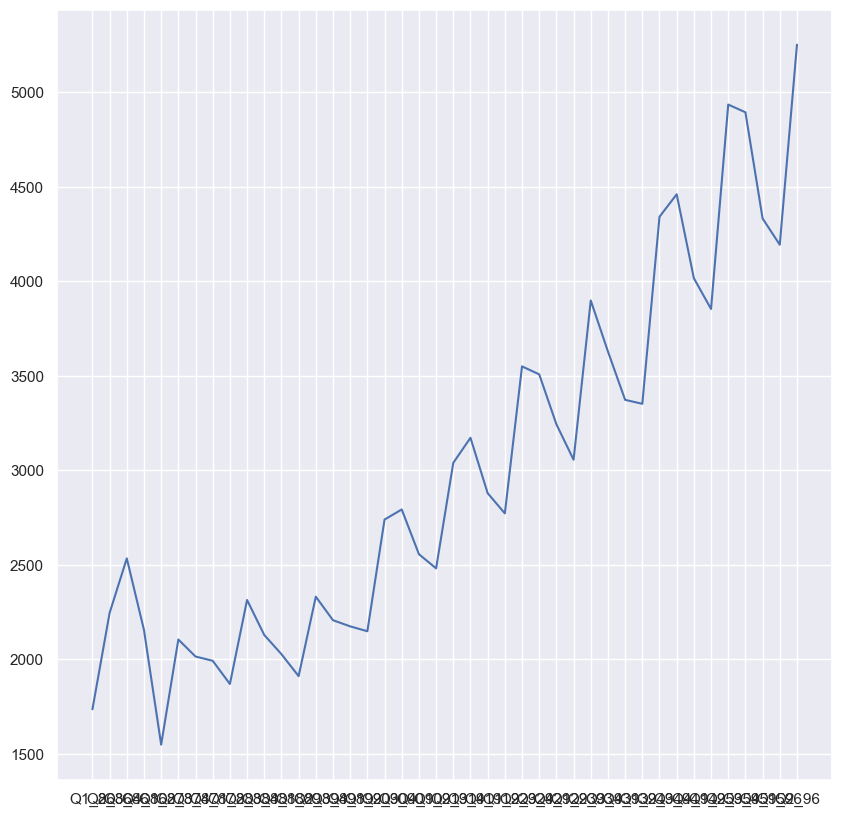

In [13]:
plt.plot(df['Quarter'],df['Sales'])

<Axes: xlabel='Quarter'>

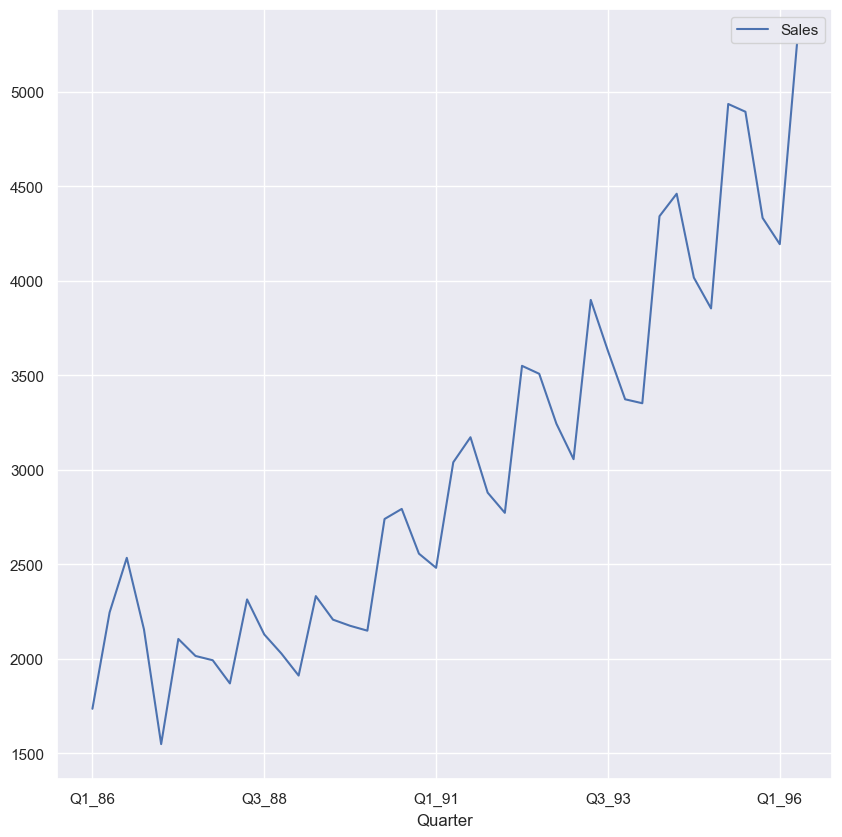

In [14]:
df.set_index('Quarter',inplace=True)
df.plot()

In [15]:
ts_data= df['Sales']

<Axes: xlabel='Quarter'>

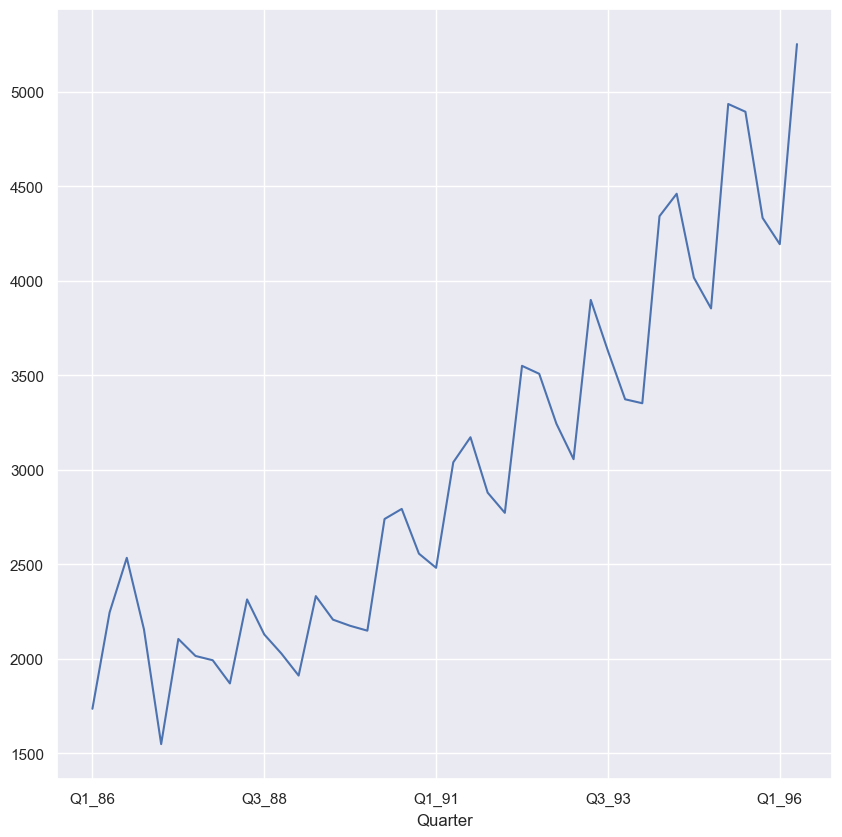

In [16]:
ts_data.plot()

In [17]:
ts_data_log=np.log(ts_data)

<Axes: xlabel='Quarter'>

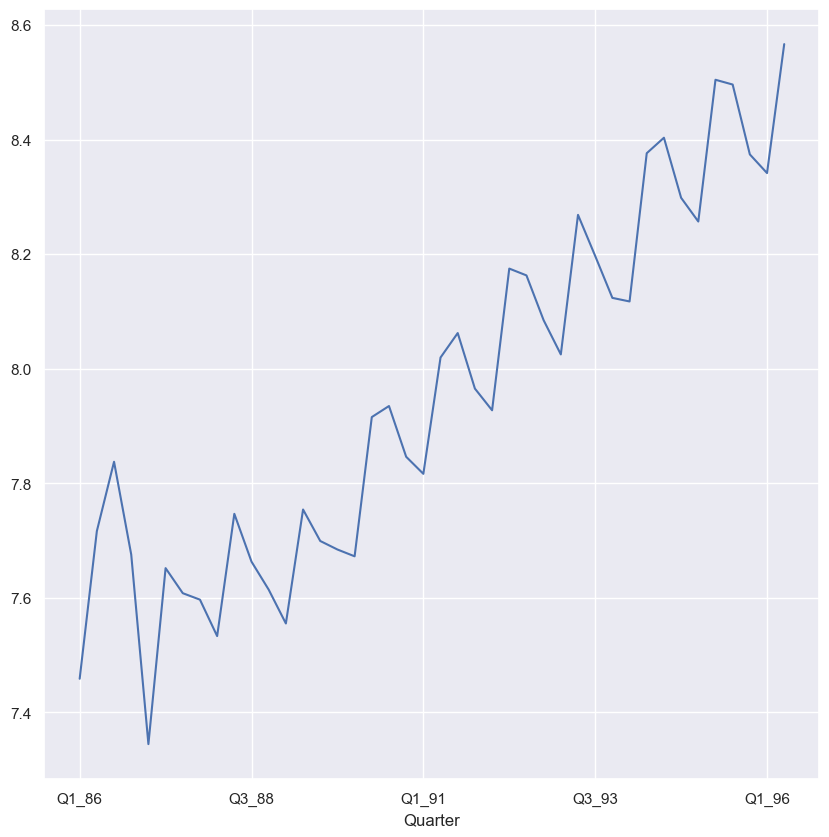

In [18]:
ts_data_log.plot()

In [25]:
Train = df.head(48)
Test =df.tail(12)

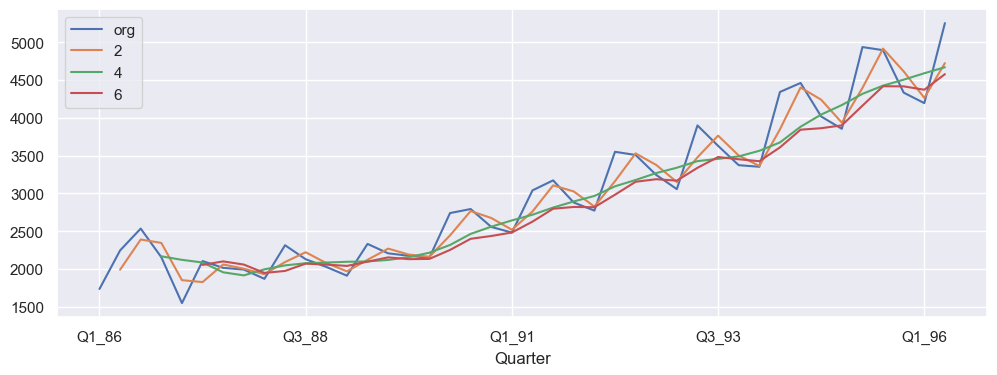

In [26]:
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
for i in range(2,8,2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

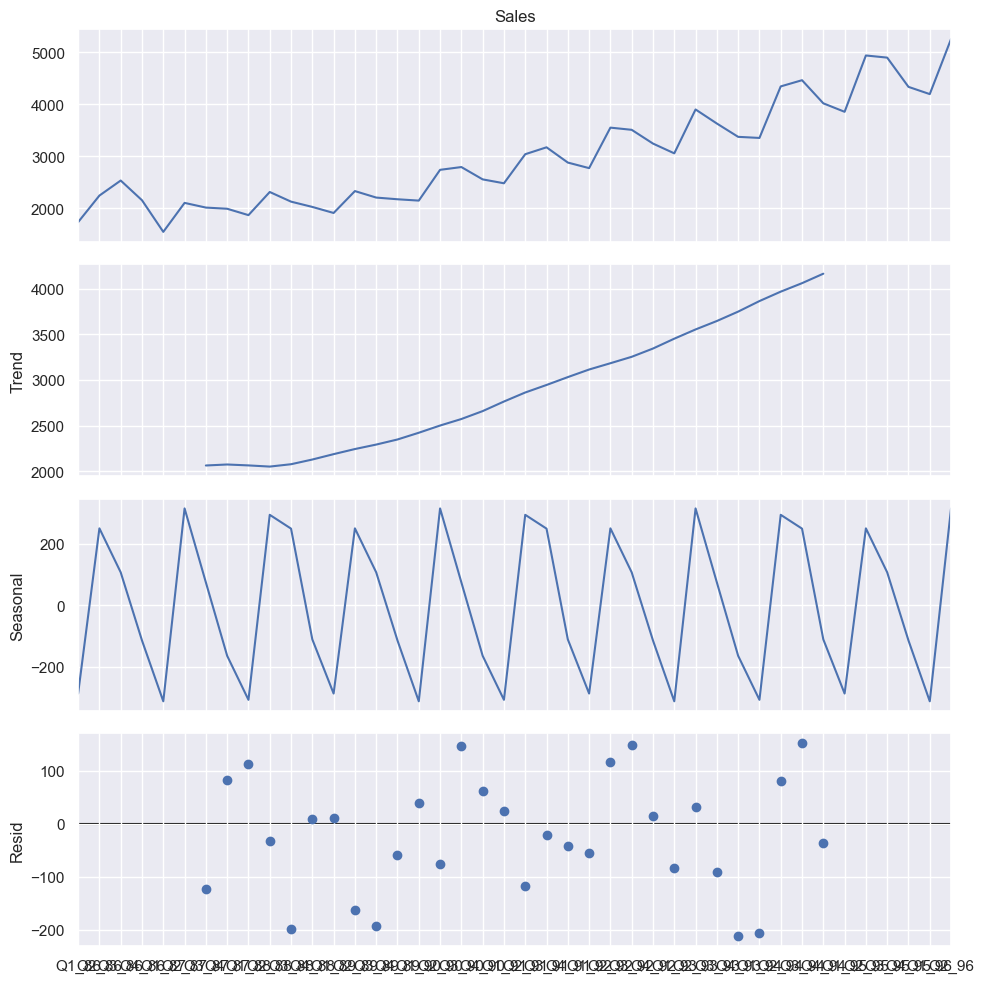

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(df.Sales,period=12)
decompose_ts_add.plot()
plt.show()

### Smoothing

In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [29]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [30]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Sales, pred_ses)
rmse_ses_model

C:\Users\Prathyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


539.7318240052876

In [31]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Sales, pred_hw)
rmse_hw_model

C:\Users\Prathyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


543.8346529093939

In [32]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

C:\Users\Prathyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


139.49914430480956

In [33]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

C:\Users\Prathyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


185.50303104018207

In [34]:
df["t"] = np.arange(1,43)
df["t_squared"] = df["t"]*df["t"]

df["log_sales"] = np.log(df["Sales"])

df.head()

,Sales,t,t_squared,log_sales
Quarter,,,,
Q1_86,1734.827000,1,1,7.458663
Q2_86,2244.960999,2,4,7.716443
Q3_86,2533.804993,3,9,7.837477
Q4_86,2154.962997,4,16,7.675529
Q1_87,1547.818996,5,25,7.344602


In [36]:
# Splitting data into Train and Test (77/33)
Train = df.head(32)
Test = df.tail(10)

In [37]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767115

In [38]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076576

In [39]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_Quad_model

457.73573554072897

### Dickey-Fuller test

In [40]:
def test_stationarity(timeseries):
    
    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    
    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')
    
    
    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                  1.309421
p-value                         0.996661
#Lags Used                      7.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


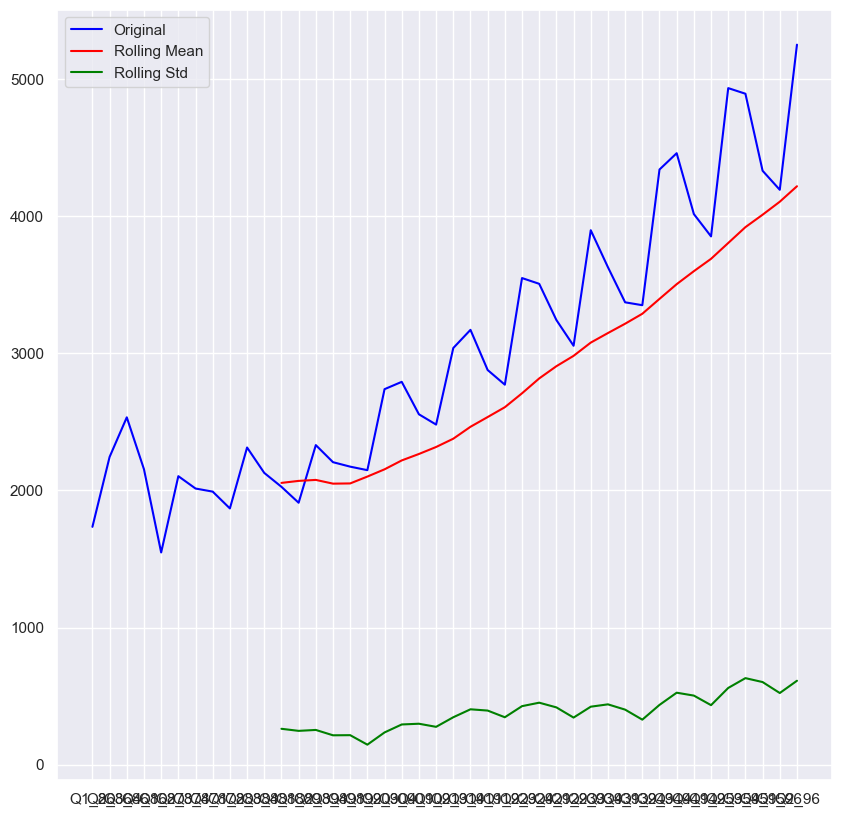

In [41]:
test_stationarity(df['Sales'])

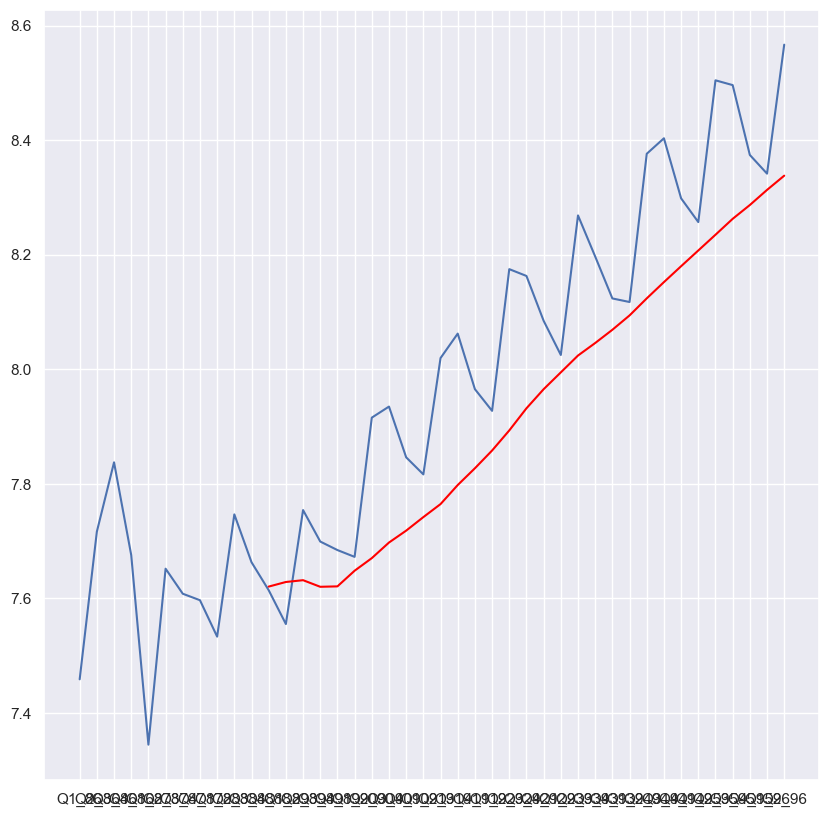

In [42]:
movingAverage = ts_data_log.rolling(window = 12).mean()
movingSTD = ts_data_log.rolling(window = 12).std()
plt.plot(ts_data_log)
plt.plot(movingAverage,color='red')

In [43]:
ts_data_log_diff = ts_data_log - movingAverage
ts_data_log_diff.head(15)

Quarter
Q1_86         NaN
Q2_86         NaN
Q3_86         NaN
Q4_86         NaN
Q1_87         NaN
Q2_87         NaN
Q3_87         NaN
Q4_87         NaN
Q1_88         NaN
Q2_88         NaN
Q3_88         NaN
Q4_88   -0.006306
Q1_89   -0.073402
Q2_89    0.122407
Q3_89    0.078993
Name: Sales, dtype: float64

In [44]:
ts_data_log_diff.dropna(inplace=True)
ts_data_log_diff.head()

Quarter
Q4_88   -0.006306
Q1_89   -0.073402
Q2_89    0.122407
Q3_89    0.078993
Q4_89    0.063385
Name: Sales, dtype: float64

Results of Dickey-Fuller Test :

Test Statistic                 -3.552128
p-value                         0.006745
#Lags Used                      4.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


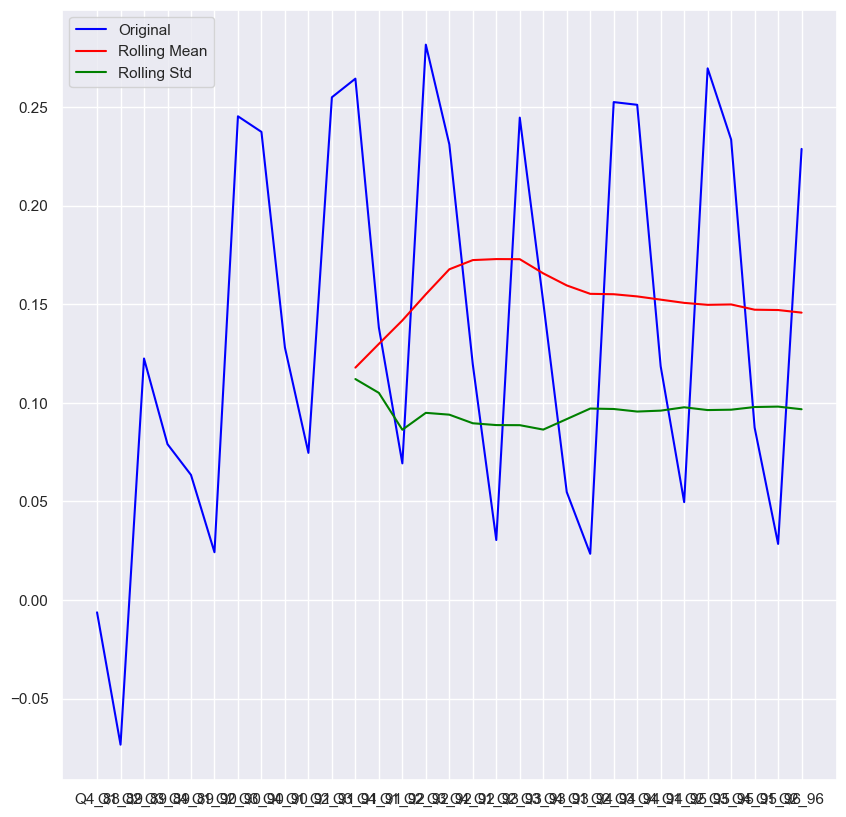

In [45]:
test_stationarity(ts_data_log_diff)

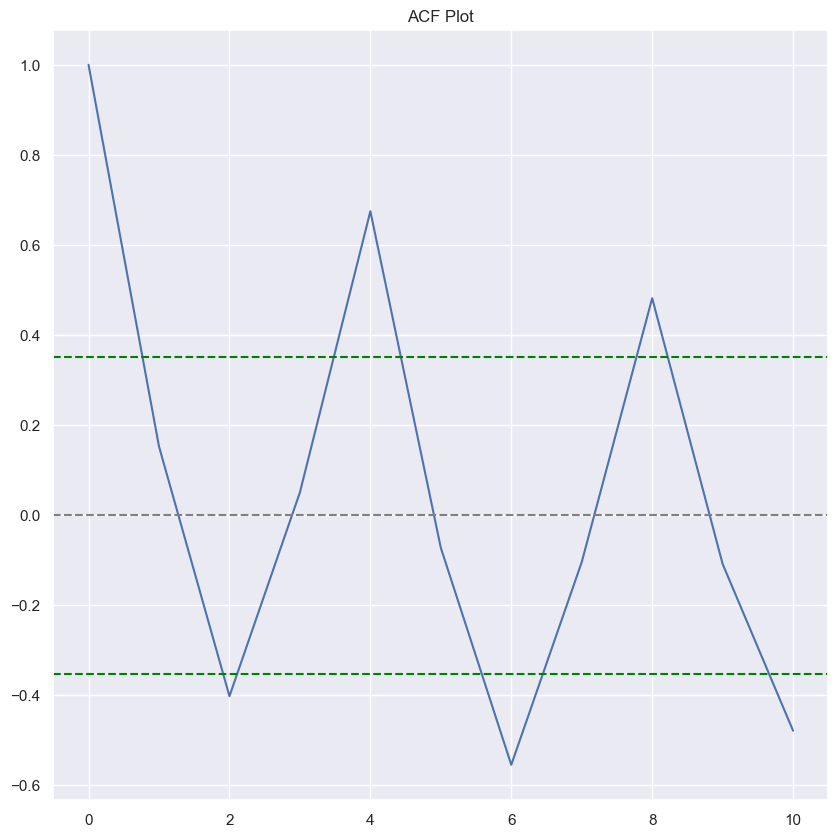

In [46]:
# Plotting the ACF curve

plt.plot(np.arange(0,11), acf(ts_data_log_diff, nlags = 10))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('ACF Plot')
plt.show()

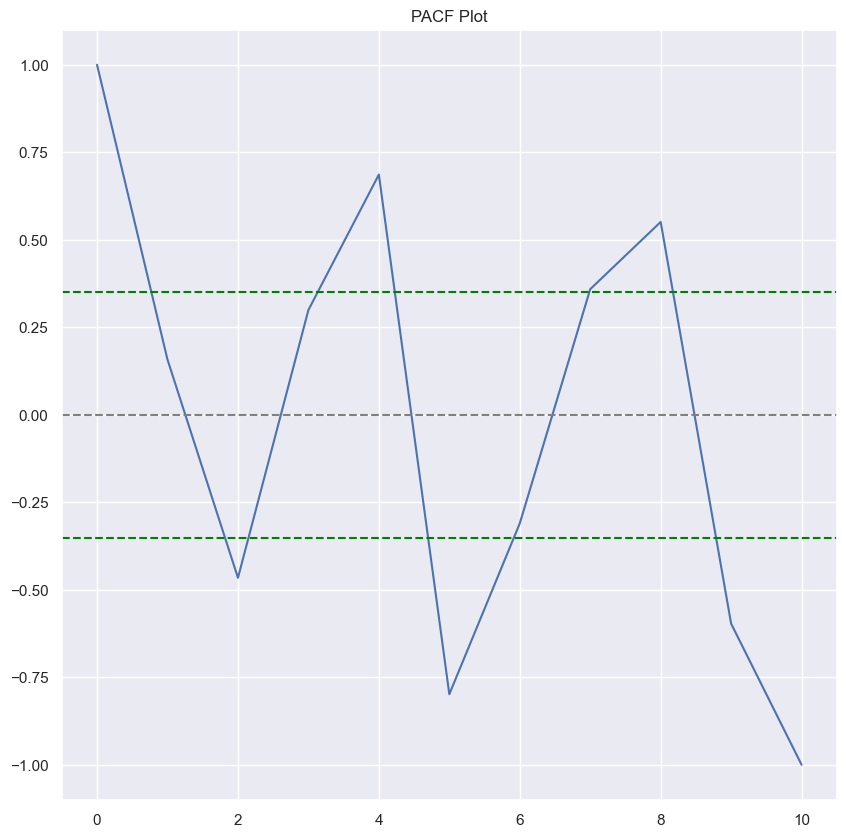

In [47]:
# Plotting the PACF curve

plt.plot(np.arange(0,11), pacf(ts_data_log_diff, nlags = 10))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('PACF Plot')
plt.show()

### ARIMA model

In [48]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(ts_data_log, order=(2,2,2))

C:\Users\Prathyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Prathyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Prathyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [49]:
results = model.fit()

C:\Users\Prathyusha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


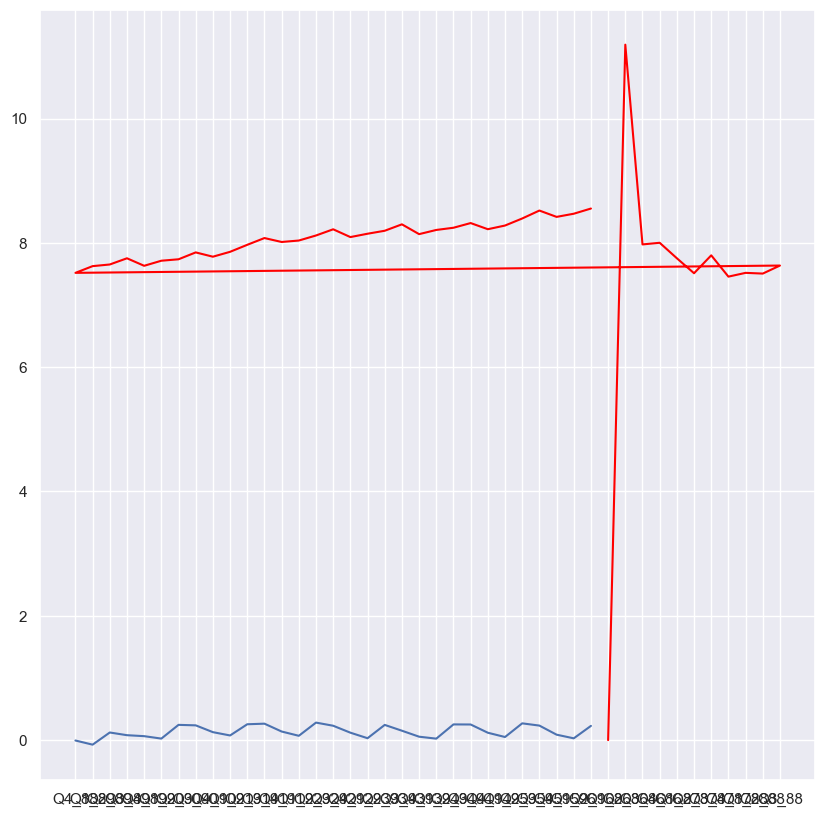

In [50]:
plt.plot(ts_data_log_diff)
plt.plot(results.fittedvalues,color='red')
plt.show()

In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(2, 2, 2)   Log Likelihood                  32.480
Date:                Tue, 12 Dec 2023   AIC                            -54.959
Time:                        11:56:55   BIC                            -46.515
Sample:                             0   HQIC                           -51.906
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0064      0.165      0.039      0.969      -0.317       0.330
ar.L2         -0.6454      0.130     -4.981      0.000      -0.899      -0.391
ma.L1         -1.5795      0.224     -7.039      0.000      -2.019      -1.140
ma.L2          0.7185      0.214      3.355      0.001       0.299       1.138
sigma2         0.0100      0.003      3.794      0.000       0.005       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 0.11
Prob(Q):                              0.65   Prob(JB):                         0.94
Heteroskedasticity (H):               0.39   Skew:                            -0.10
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""